In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Luiza\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Luiza\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df_colesterol = pd.read_csv('datasets\colesterol.csv')

In [8]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    object 
 1   fumante                 997 non-null    object 
 2   nivel_atividade_fisica  996 non-null    object 
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [5]:
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [7]:
df_colesterol.columns = ['grupo_sanguineo', 'fumante', 'nivel_atividade_fisica', 'idade', 'peso', 'altura', 'nivel_colesterol']

In [9]:
df_colesterol_eda = df_colesterol.copy()
df_colesterol_bucketing = df_colesterol.copy()

In [10]:
df_colesterol_eda.head(5)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [37]:
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [12]:
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [13]:
# Coletar medidas das variaveis categoricas
moda_grupo_sang = df_colesterol_eda['grupo_sanguineo'].mode()
moda_fumante = df_colesterol_eda['fumante'].mode()
moda_nivel_atividade_fisica = df_colesterol_eda['nivel_atividade_fisica'].mode()

In [14]:
# Coletar medidas das variaveis numericas
mediana_idade = df_colesterol_eda['idade'].median()
mediana_peso = df_colesterol_eda['peso'].median()
mediana_altura = df_colesterol_eda['altura'].median()

In [15]:
df_colesterol_eda.fillna({'grupo_sanguineo': moda_grupo_sang[0], 'fumante': moda_fumante[0], 'nivel_atividade_fisica': moda_nivel_atividade_fisica[0], 
                          'idade': mediana_idade, 'peso': mediana_peso, 'altura': mediana_altura}, inplace=True)

In [17]:
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

<AxesSubplot:xlabel='idade'>

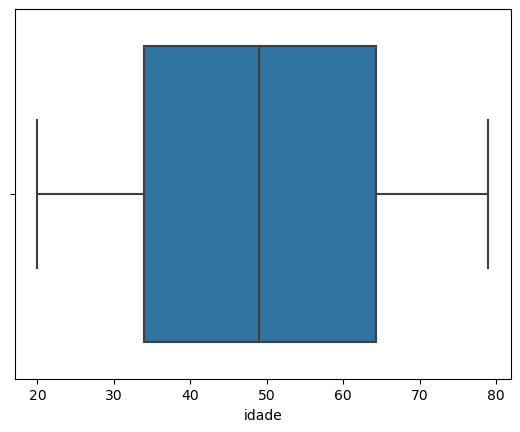

In [18]:
# Outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<AxesSubplot:xlabel='peso'>

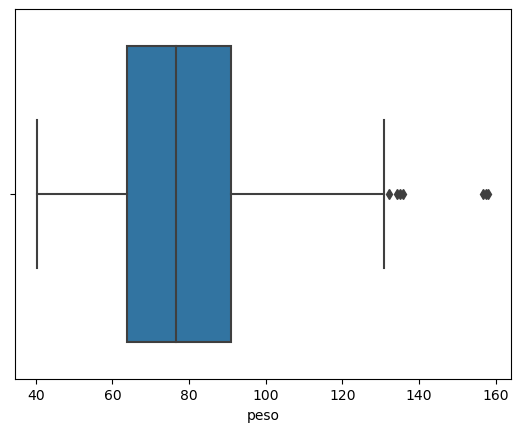

In [23]:
# Outliers
sns.boxplot(data=df_colesterol_eda, x='peso')

In [21]:
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

37

In [22]:
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, inplace=True)

<AxesSubplot:xlabel='altura'>

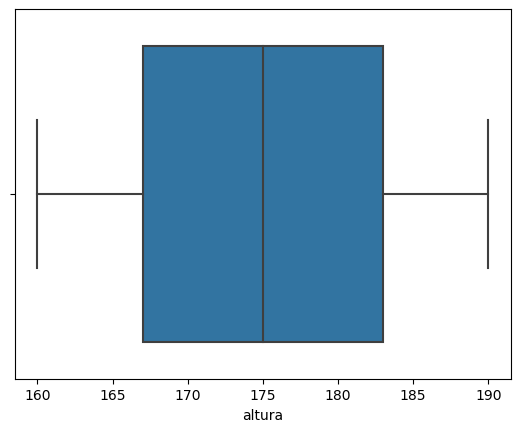

In [24]:
# Outliers
sns.boxplot(data=df_colesterol_eda, x='altura')

<AxesSubplot:xlabel='nivel_colesterol'>

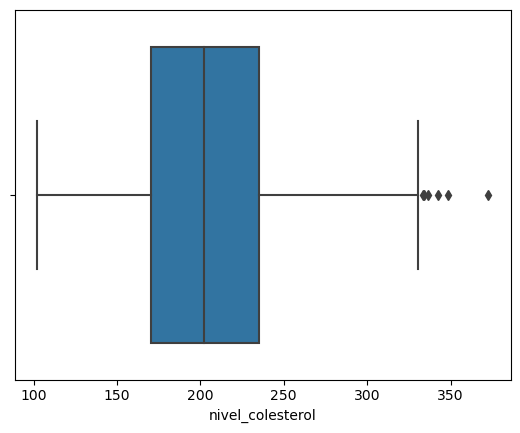

In [25]:
# Outliers
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

<AxesSubplot:xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

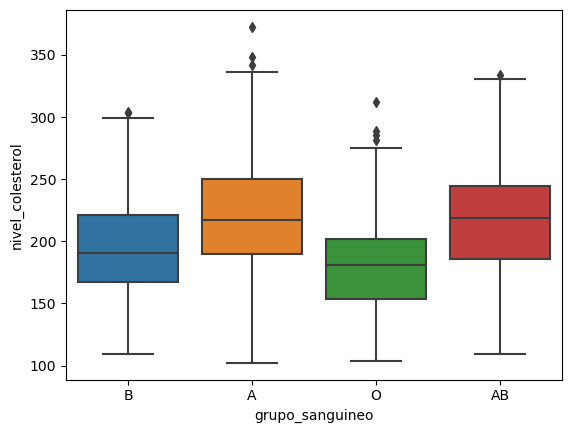

In [26]:
# Cruzamento de variaveis categoricas
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<AxesSubplot:xlabel='fumante', ylabel='nivel_colesterol'>

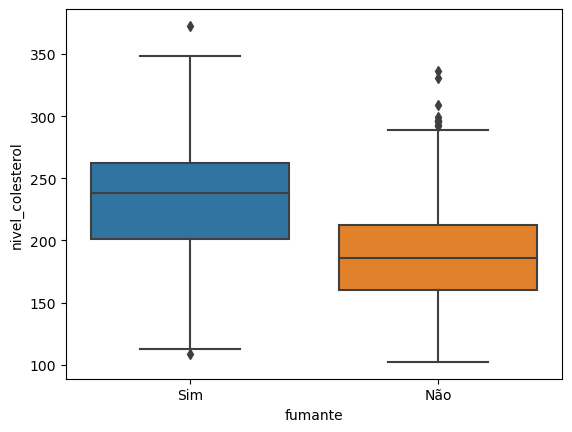

In [27]:
# Cruzamento de variaveis categoricas
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<AxesSubplot:xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

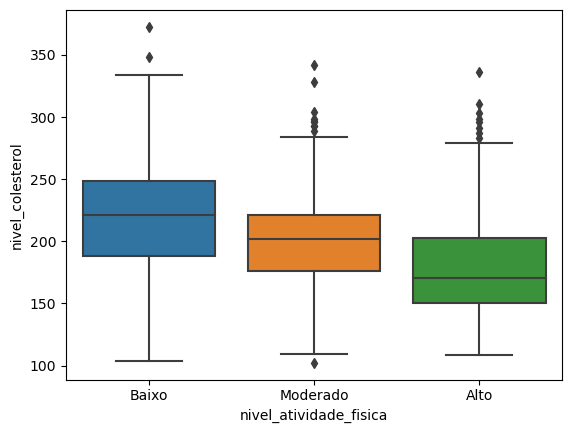

In [28]:
# Cruzamento de variaveis categoricas
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<AxesSubplot:xlabel='idade', ylabel='nivel_colesterol'>

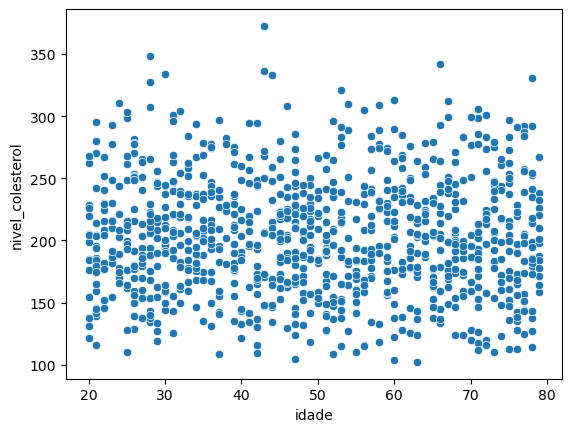

In [32]:
# Cruzamento de variaveis numericas
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<AxesSubplot:xlabel='peso', ylabel='nivel_colesterol'>

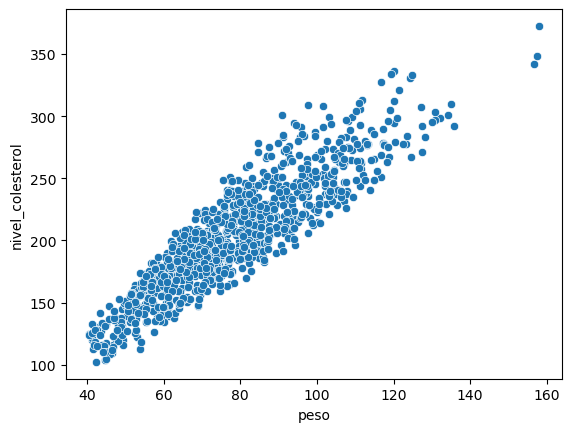

In [33]:
# Cruzamento de variaveis numericas
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<AxesSubplot:xlabel='altura', ylabel='nivel_colesterol'>

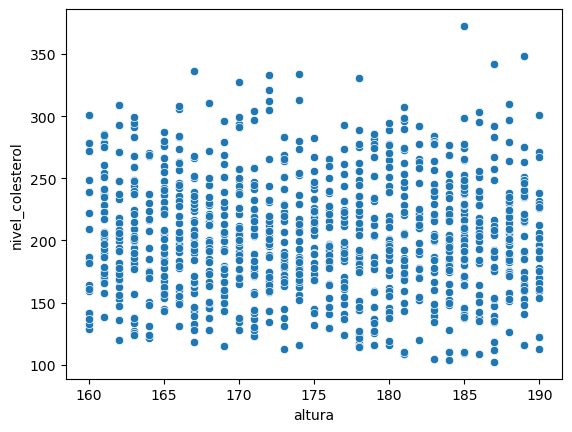

In [34]:
# Cruzamento de variaveis numericas
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

In [39]:
# Converter variaveis categoricas nominais em numericas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype=int)

In [42]:
df_colesterol_eda.head(5)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0


In [41]:
# converter variaveis categoricas ordinais em numericas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1

<AxesSubplot:>

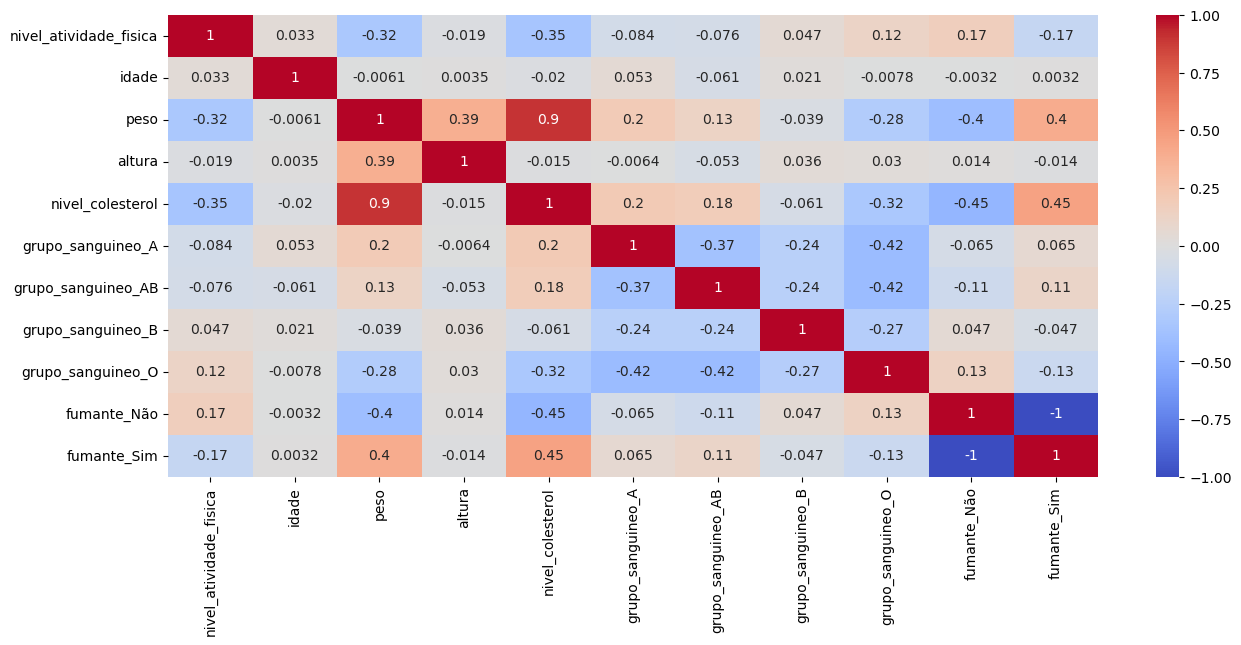

In [45]:
# Mapa de calor de correlacao entre variaveis 
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

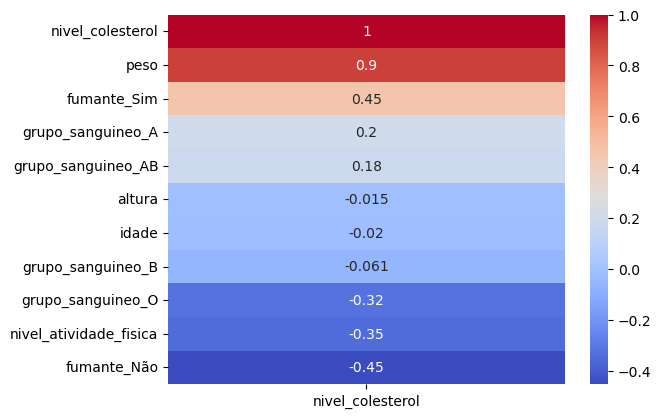

In [46]:
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), annot=True, cmap='coolwarm')

In [49]:
# Bucketing Idade
bins_idade = [20, 30, 40, 50, 60, 70, 80] 
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-79', '70-89']
df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins = bins_idade, labels = labels_idade, include_lowest = True)

In [53]:
df_colesterol_bucketing.head(5)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade,escala_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-79,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-89,80-89


c:\Users\Luiza\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='escala_idade', ylabel='nivel_colesterol'>

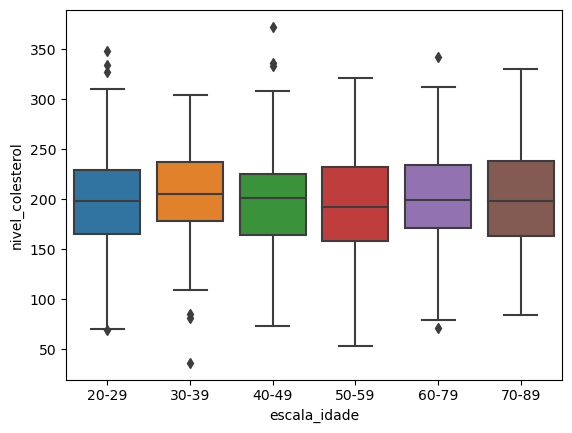

In [51]:
sns.boxplot(data=df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [52]:
# Bucketing Idade
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160] 
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins = bins_peso, labels = labels_peso, include_lowest = True)

c:\Users\Luiza\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='escala_peso', ylabel='nivel_colesterol'>

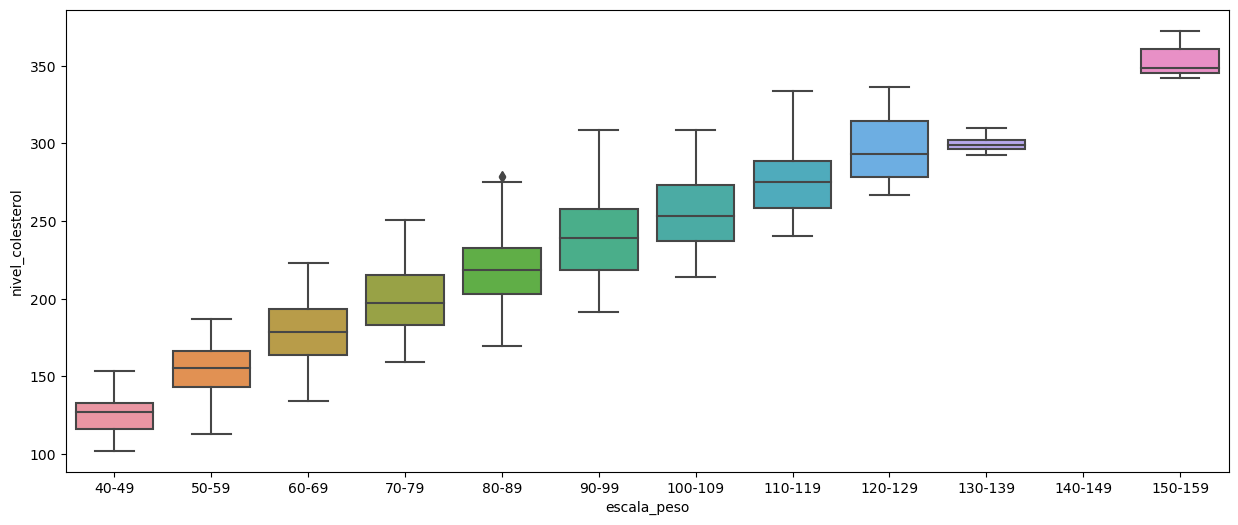

In [55]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [57]:
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, inplace=True)

In [58]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [59]:
X = df_colesterol.drop(columns=['nivel_colesterol'], axis=1)
y = df_colesterol['nivel_colesterol']


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [62]:
X_train.shape

(674, 6)

## Treino do Modelo

In [63]:
# Pipeline
# Imputar moda nas variaveis categoricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Padronizar variaveis numericas - idade, peso, altura
# OneHotEncoder nas variaveis categoricas nominais - grupo_sanguineo, fumante
# Ordinal Encoder nas variaveis categoricas ordinais - nivel_atividade_fisica
# Inputar mediana nas variaveis numericas - idade, peso, altura

# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'peso', 'altura']
colunas_ordinais = ['nivel_atividade_fisica']

In [64]:
# Transformers Categoricos
transformers_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [66]:
transformers_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [67]:
transformers_numericos = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [68]:
# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformers_numericos, colunas_numericas),
        ('cat', transformers_categorias, colunas_categoricas),
        ('ord', transformers_ordinais, colunas_ordinais)
    ]
)

In [69]:
# Pipeline principal
model_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())
])

In [70]:
# Treinar o modelo
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gr

## Métricas

In [71]:
y_pred = model_reg.predict(X_test)

In [72]:
r2_score(y_test, y_pred)

0.9594250724093465

In [73]:
# MAE
mean_absolute_error(y_test, y_pred)

7.313838031022501

In [74]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

9.097649246487029

## Analise de Residuos

In [75]:
residuos = y_test - y_pred

In [77]:
from scipy.stats import zscore
residuos_std = zscore(residuos)

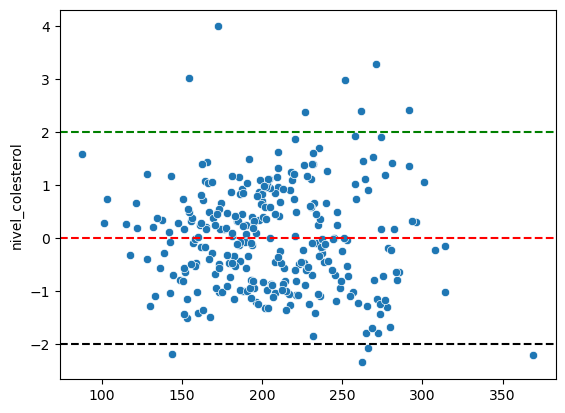

In [79]:
# Verificar linearidade dos residuos: Valores entre -2 e 2
# Verificar homocedasticidade dos residuos: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(2, color='green', linestyle='--')
plt.axhline(-2, color='black', linestyle='--')

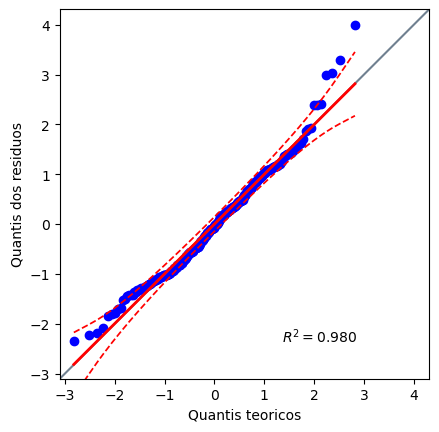

In [80]:
# Verificar se seguem uma distribuicao normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teoricos')
plt.ylabel('Quantis dos residuos')
plt.show()

In [86]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

# Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print('Estatistica de Shapiro:{0}, P-Value de Shapiro:{1}'.format(stat_shapiro, p_value_shapiro))

Estatistica de Shapiro:0.9807736277580261, P-Value de Shapiro:0.000626839988399297


In [85]:
# Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print('Estatistica de Shapiro:{0}, P-Value de kolmogorov:{1}'.format(stat_ks, p_value_ks))

Estatistica de Shapiro:0.42455920998485613, P-Value de Shapiro:8.925833190910163e-48


In [87]:
# lliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print('Estatistica de Shapiro:{0}, P-Value de lliefors:{1}'.format(stat_ll, p_value_ll))

Estatistica de Shapiro:0.04955371030192918, P-Value de Shapiro:0.12533323720735734


In [101]:
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

X_test_transformed = pipe.fit_transform(X_test)

In [102]:
test_goldfield = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfield = test_goldfield[0]
p_value_goldfield = test_goldfield[1]
print('Estatistica do Teste:{0}, P-Value:{1}'.format(stat_goldfield, p_value_goldfield))

Estatistica do Teste:0.6716135765253545, P-Value:0.9893959472385482


## Realizar predições

In [103]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto',
    'idade': 40,
    'peso': 70,
    'altura': 180
}

sample_df = pd.DataFrame(predicao_individual, index=[1])

In [104]:
# Predicao
model_reg.predict(sample_df)

array([165.32375099])

In [105]:
# Salvar o modelo
import joblib

joblib.dump(model_reg, 'model_colesterol.pkl')

['model_colesterol.pkl']